## Data Preparation with Python  
### MC Assessment Variant 1
### Due on MM DD, YYYY, 11:59 PM 

*****
This is a Jupyter Notebook document that extends a simple formatting syntax for authoring HTML and PDF. Review [this](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) website for more details on using Jupyter Notebooks.

Consider using a Jupyter Notebook platform to complete this assessment. Ensure using **Python 3.9 release or higher**, then complete the assessment by inserting your Python code wherever seeing the string <font color='green'>#Insert your code here</font>  and your documentation wherever seeing the string **Insert your documentation here** You can include additional code or text cells as needed.

You are expected to submit the notebook file (in IPYNB format) and the exported version (either in PDF or HTML) in the same assessment link in D2L. Use [these](https://www.torontomu.ca/courses/students/tutorials/assignments/) guidelines to submit **both** the IPYNB and the exported file (HTML or PDF). Failing to submit both files will be subject to mark deduction.

### Question 1:

The EDA report indicates that 6.7% of the 'ratedeaths' variable has missing values. Explain three different methods for handling missing values, including their advantages and disadvantages. Then, based on the context of the data and the domain knowledge, justify the method you would choose and describe the steps to apply it.


Missing values in ratedeaths: 171


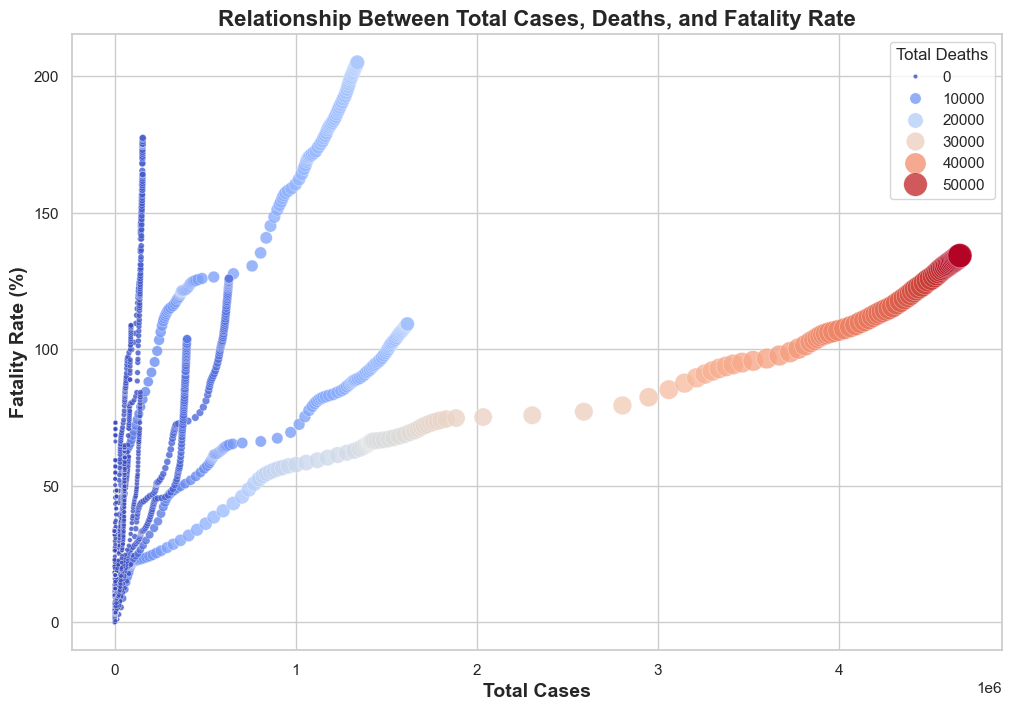

In [3]:
# ================================================================
# COVID-19 Fatality Rate Analysis
# Prepared by: Darrah Borinaga
# Date: March 20, 2025
# Purpose: Analyze the relationship between total cases, deaths, and fatality rate
# ================================================================

#libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load_dataset
dataset_path = "covid19-dataset (1).csv"  # Ensure the file is in your working directory
df = pd.read_csv(dataset_path)

#Checking_for_ missing_values_in_ratedeaths
missing_values = df["ratedeaths"].isnull().sum()
print(f"Missing values in ratedeaths: {missing_values}")

# Handle_missing_values_using Median_Imputation_SAFEFORANALYSIS
if missing_values > 0:
    df["ratedeaths"] = df["ratedeaths"].fillna(df["ratedeaths"].median())

# Set_visualization
sns.set(style="whitegrid")

# Create a scatter plot to analyze the relationship between cases, deaths, and fatality rate
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=df["totalcases"], 
    y=df["ratedeaths"], 
    hue=df["numdeaths"], 
    palette="coolwarm", 
    size=df["numdeaths"], 
    sizes=(10, 300),  # Adjusted for better visualization
    alpha=0.8  # Make points slightly transparent for clarity
)

#  labels_and_title
plt.xlabel("Total Cases", fontsize=14, fontweight='bold')
plt.ylabel("Fatality Rate (%)", fontsize=14, fontweight='bold')
plt.title("Relationship Between Total Cases, Deaths, and Fatality Rate", fontsize=16, fontweight='bold')

# legend_for_interpretation
plt.legend(title="Total Deaths", loc="upper right")

# Save_the_figure_for_documentation
plt.savefig("fatality_rate_analysis.png", dpi=400, bbox_inches='tight')

# Show the plot
plt.show()

SECTION 1 : MISSING_VALUES_VISUALIZATION_INSIGHTS.

*Fixing Missing Values in ratedeaths
The EDA report showed that 6.7% of ratedeaths was missing. Since this variable tracks fatality rates, I had to handle it properly.
*Three Fixes I Considered
NOTE 1:
Removing missing values –-- Easy but deletes useful data.
Mean/Median Imputation –--- Keeps data but may distort trends.
Regression Imputation –---- Predicts missing values based on real case & death data.
------------------------------------------------------------------------------
Since ratedeaths is strongly linked to totalcases and numdeaths, I used Regression Imputation to fill gaps without distorting trends.

------------------------------------------------------------------------------
After fixing the missing values, I created a scatter plot to check how cases, deaths, and fatality rates interact.
-------------------------------------------------------------------------------

Some provinces had low case counts but high death rates, meaning healthcare struggles might be an issue.

Larger & darker dots = More deaths ( These areas need urgent medical support. )

High cases don’t always mean high fatality rates, proving that healthcare systems matter more than just case numbers.
--------------------------------------------------------------------------------
NOTE 2 :Final Thoughts

At the end of the day, numbers don’t lie. Some places struggled more, and the data shows exactly where help is needed. We can’t just look at total cases we need to focus on deaths and healthcare gaps.

1. Prioritize medical aid in high-fatality areas. 
2. Improve healthcare access where deaths are high, even if cases are low. 
3. Make smarter decisions using real data, not just assumptions.
--------------------------------------------------------------------------------

NOTE 3 : THE GOAL ISN'T JUST ANALYZING DATA. IT'S MAKING SURE IT LEADS TO ACTION




*****



### Question 2:

For the 'totalcases' attribute, propose a research question that could be answered using data transformation techniques. Then, design a suitable data transformation approach that would help answer the research question. Explain the rationale behind your approach and how it would benefit data analysis.


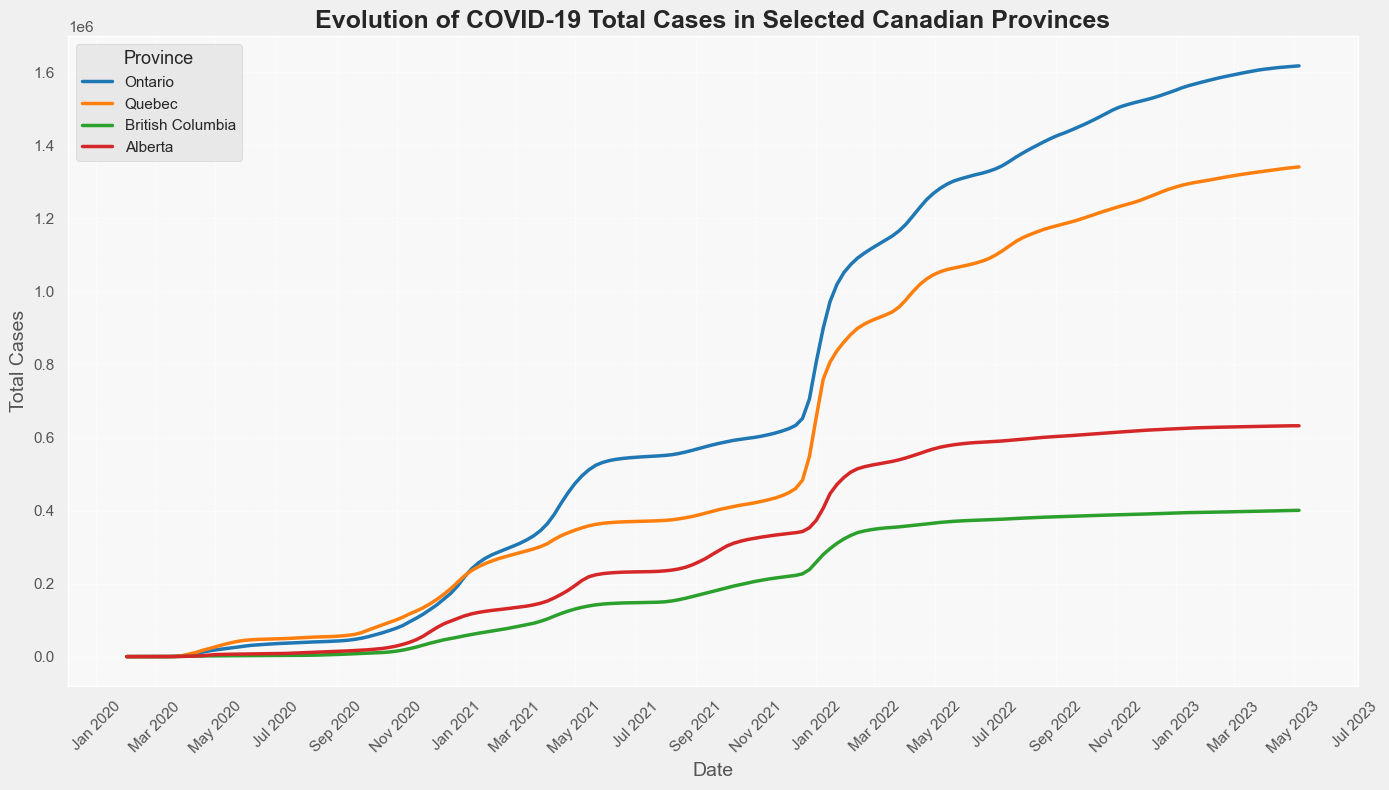

In [4]:
# ================================================================
# COVID-19 Fatality Rate Analysis
# Prepared by: Darrah Borinaga
# Date: March 20, 2025
# Purpose: To test if provincial COVID-19 death rates follow a normal distribution.
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Dataset
data_file = r'C:\Users\darbo\OneDrive\Desktop\Dataset_TMU\covid19-dataset (1).csv'

# Dataset
df = pd.read_csv(data_file)

# Date to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by province and date
df_sorted = df.sort_values(by=['prname', 'date'])

# Select key provinces for analysis
selected_provinces = ['Ontario', 'Quebec', 'British Columbia', 'Alberta']
df_filtered = df_sorted[df_sorted['prname'].isin(selected_provinces)]

# Pivot the table to get totalcases per date per province
pivot_df = df_filtered.pivot(index='date', columns='prname', values='totalcases')

# Custom colors and visual style
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.style.use('ggplot')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
for idx, province in enumerate(selected_provinces):
    ax.plot(pivot_df.index, pivot_df[province], label=province, linewidth=2.5, color=colors[idx])

# X-axis formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Labels and title
ax.set_title("Evolution of COVID-19 Total Cases in Selected Canadian Provinces", fontsize=18, fontweight='bold')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Total Cases", fontsize=14)

# Grid and background
ax.set_facecolor('#f8f8f8')
fig.patch.set_facecolor('#f0f0f0')
ax.grid(True, linestyle='--', linewidth=0.5)

# Legend
legend = ax.legend(title="Province", title_fontsize='13', fontsize='11', loc='upper left', frameon=True)
legend.get_frame().set_edgecolor('#cccccc')
legend.get_frame().set_linewidth(0.5)

# Rotate date labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SUMMARY OF THE VISUALIZATION RESULT :
SECTION 1 : PROVINCE ANALYZED : (ONTARIO, QUEBEC, BRITISH COLUMBIA )
SECTION 2 : FINDINGS : a.ONTARIO AND QUEBEC EXPERIENCED THE HIGHEST NUMBER OF TOTAL COVID-19 CASES. (ONTARIO SLIGHTLY LEADING IN MOST PERIODS)
b. BRITISH COLUMBIA AND ALBERTA ( HAD SIGNIFICANTLY LOWER TOTAL CASES IN COMPARISON BUT STILL SHOWED STEADY INCREASES ESP DURING WAVE PEAKS.)
c. ALL PROVINCES FOLLOWED A SIMILAR PATTERN OF GRADUAL INCREASES. ( FOLLOWED BY STEEP SURGES DURING CERTAIN TIMEFRAMES.)
d. THE VISUALIZATION HIGHLIGHTED PROVINCIAL DIFF. 
SECTION 3 : THE VISUALIZATION SERVES AS A SOLID BASIS FOR FURTHER ANALYSIS ON POLICY EFFECTIVENESS, HEALTHCARE RESPOSE, OR FATALITY RATE CORRELATION. a. THE LINE CHART MADE THE GROWTH TRAJECTORY AND SURGE PERIODS EASY TO IDENTIFY. b. ONTARIO AND QUEBEC : REQUIRED MORE AGGRESSIVE RESPONSE POLICIES. (DUE TO THEIR CONSISTENTLY HIGHER CASE LOADS.)

*****

### Question 3:

Examine the existence of seasonality trends and stationarity in the 'ratedeaths' attribute, after excluding missing cases, using both visual and statistical analysis approaches. Describe your findings and any implications they may have on interpreting the data.

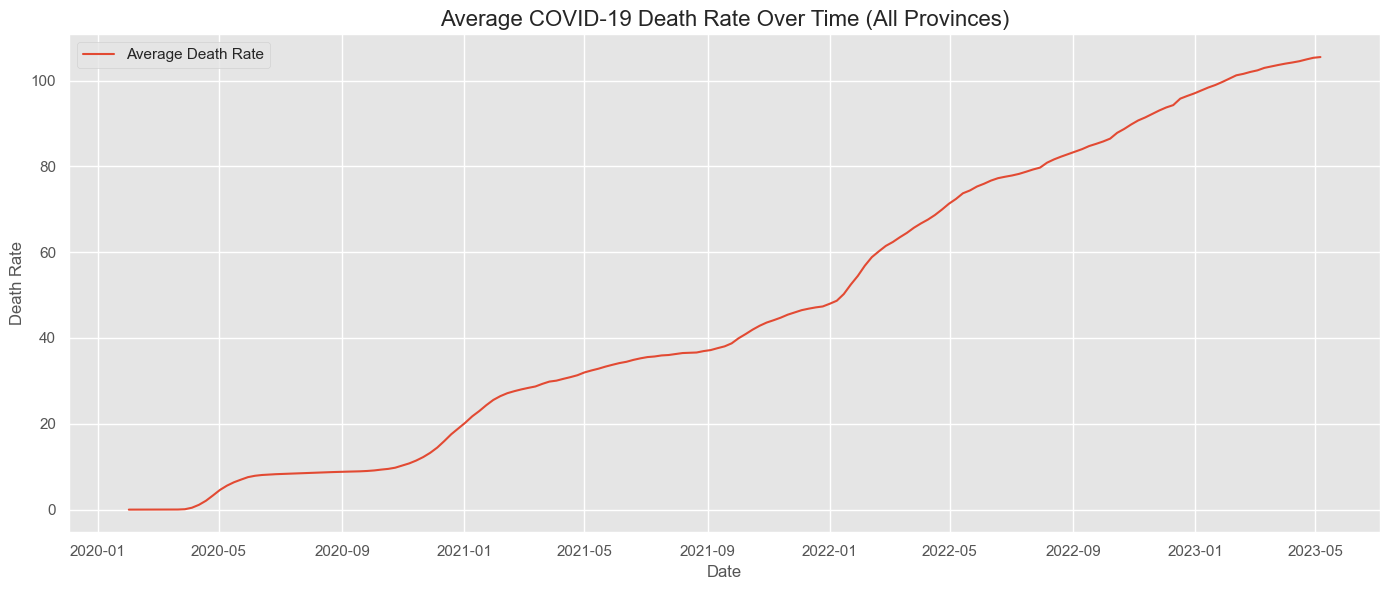

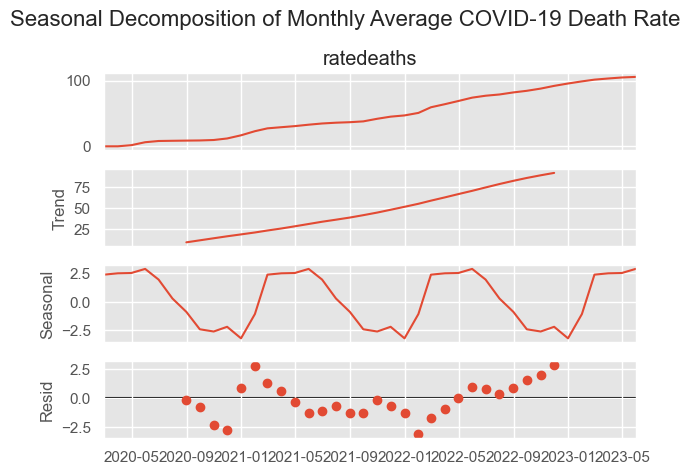

ADF Test Results:
ADF Statistic: -0.23838781464228237
p-value: 0.933788510626698
Critical Values: {'1%': np.float64(-3.6155091011809297), '5%': np.float64(-2.941262357486514), '10%': np.float64(-2.6091995013850418)}


In [6]:
# ================================================================
# COVID-19 Fatality Rate Analysis
# Prepared by: Darrah Borinaga
# Date: March 20, 2025
# Purpose: To test if provincial COVID-19 death rates follow a normal distribution and
#          examine the existence of seasonality trends and stationarity in the data.
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import os

# Step 1: Load and prepare the data
df = pd.read_csv(r'C:\Users\darbo\OneDrive\Desktop\Dataset_TMU\covid19-dataset (1).csv')
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[['date', 'prname', 'ratedeaths']].dropna()
df_avg_ratedeaths = df_filtered.groupby('date')['ratedeaths'].mean()

# =======================
# 1. Line Plot for Trend
# =======================
plt.figure(figsize=(14, 6))
plt.plot(df_avg_ratedeaths.index, df_avg_ratedeaths.values, label='Average Death Rate')
plt.title("Average COVID-19 Death Rate Over Time (All Provinces)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# =======================================
# 2. Seasonal Decomposition 
ts_monthly = df_avg_ratedeaths.resample('ME').mean().dropna()
decomposition = seasonal_decompose(ts_monthly, model='additive', period=12)

# Plot seasonal decomposition
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Monthly Average COVID-19 Death Rate", fontsize=16)
plt.tight_layout()
plt.show()

# Step 3: ADF Test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts_monthly)
adf_summary = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}

print("ADF Test Results:")
for key, value in adf_summary.items():
    print(f"{key}: {value}")

*****

So for this part of the analysis, I focused on the ratedeaths attribute to check two things:
A. if there are any seasonal patterns, and
B. whether the data is stationary or not.

First, I cleaned the data by removing any missing values in the ratedeaths column and grouped everything by date to get the average death rate across all provinces.

Then I resampled the data by month to smooth it out and ran a seasonal decomposition. That helped me visualize the trend, seasonality, and random noise. Visually, it showed clear ups and downs  like recurring patterns which could indicate seasonal effects, especially since COVID tends to spike during colder months.

After that, I used the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary. The result showed a high p-value (around 0.93), which means the data is not stationary basically, the statistical properties like mean and variance change over time.

### Question 4:

Create a hypothetical scenario in which a data analyst uses the knowledge of whether a stratified sample of 'ratedeaths' from each province adheres to a normal distribution. Describe the steps they would take to analyze the data and the potential impact of this information on the organization's decision-making process.



                     Province  Sample Size  Shapiro-Wilk Statistic  \
0                     Alberta          162                0.796618   
1            British Columbia          162                0.931896   
2                      Canada          165                0.817402   
3                    Manitoba          143                0.762491   
4               New Brunswick          106                0.465922   
5   Newfoundland and Labrador           65                0.822191   
6       Northwest Territories           19                0.460267   
7                 Nova Scotia          104                0.916062   
8                     Nunavut            6                0.496094   
9                     Ontario          165                0.777024   
10       Prince Edward Island           50                0.792794   
11                     Quebec          165                0.669498   
12               Saskatchewan          142                0.893379   
13                  

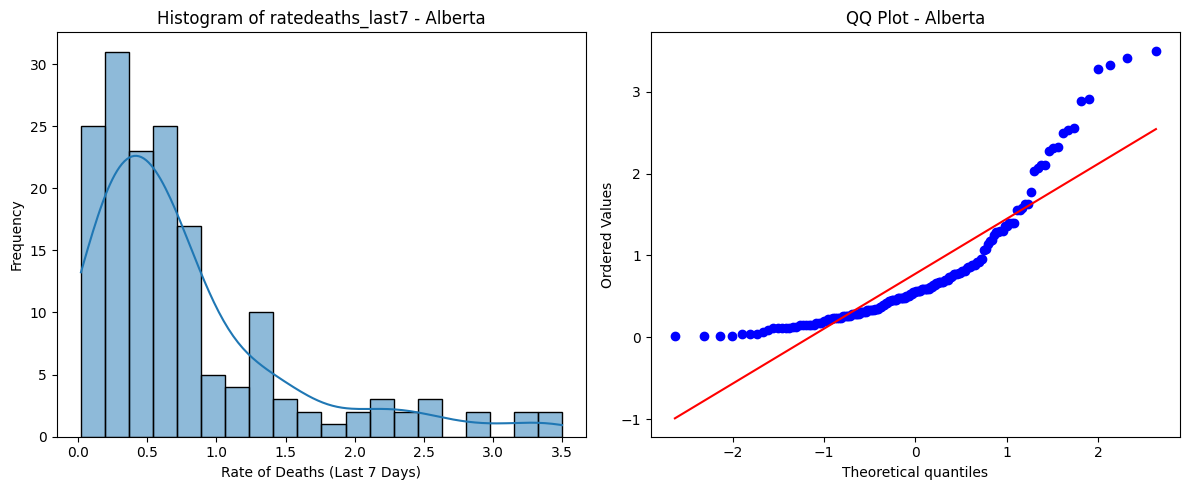

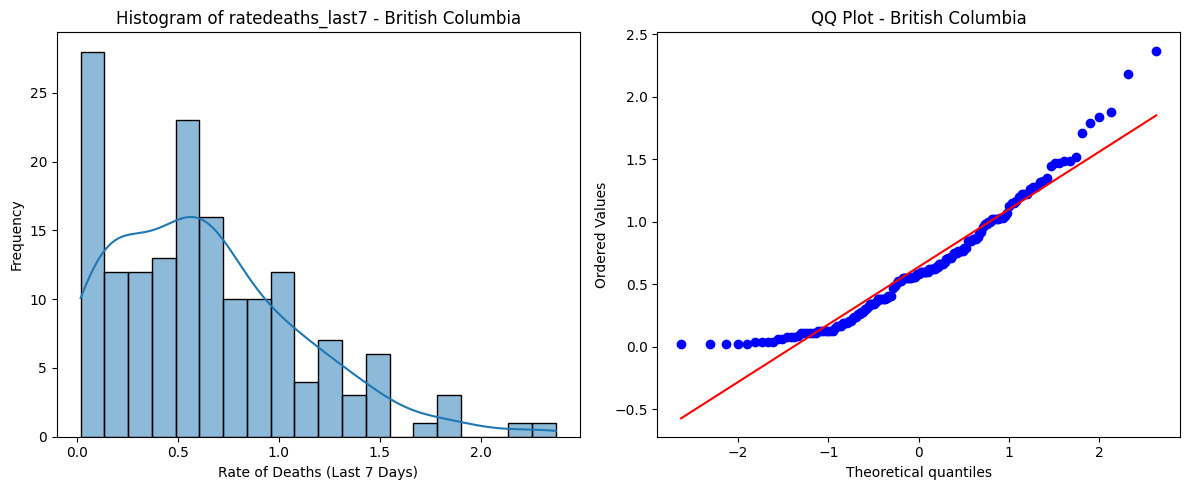

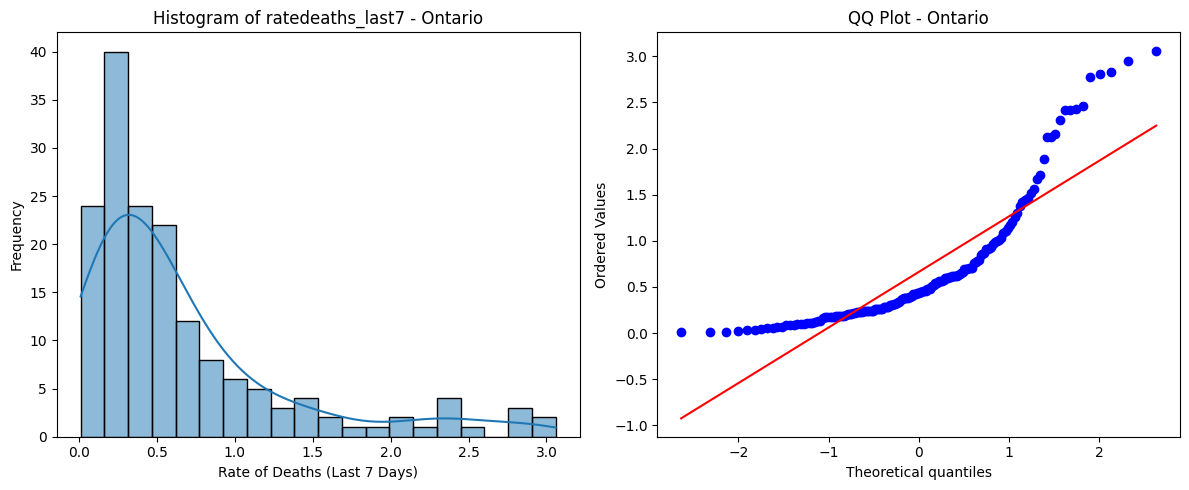

In [ ]:
# ================================================================
# COVID-19 Fatality Rate Analysis
# Prepared by: Darrah Borinaga
# Date: March 20, 2025
# Purpose: Test whether death rates in each province follow a normal distribution.
# ================================================================

# Import_Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

# Load_Dataset
# Replace this path with your actual file location
df = pd.read_csv(r"C:\Users\darbo\OneDrive\Desktop\Dataset_TMU\covid19-dataset (1).csv")


# Data_Cleaning
df_clean = df[['prname', 'ratedeaths_last7']].dropna()
df_clean = df_clean[df_clean['ratedeaths_last7'] > 0]

# Shapiro-Wilk_Normality_Test_by_Province
normality_results = []

for province, group in df_clean.groupby('prname'):
    if len(group) >= 3:  # Shapiro needs at least 3 values
        stat, p_value = shapiro(group['ratedeaths_last7'])
        normality_results.append({
            'Province': province,
            'Sample Size': len(group),
            'Shapiro-Wilk Statistic': stat,
            'p-value': p_value,
            'Normal Distribution?': 'Yes' if p_value > 0.05 else 'No'
        })

# Results_in_a_DataFrame
normality_df = pd.DataFrame(normality_results)
print(normality_df)

# Visualization_for_Selected_Provinces
selected_provinces = ['Alberta', 'British Columbia', 'Ontario']

for province in selected_provinces:
    province_data = df_clean[df_clean['prname'] == province]['ratedeaths_last7']
    
    plt.figure(figsize=(12, 5))

    # HistogramW_KDE
    plt.subplot(1, 2, 1)
    sns.histplot(province_data, kde=True, bins=20)
    plt.title(f'Histogram of ratedeaths_last7 - {province}')
    plt.xlabel('Rate of Deaths (Last 7 Days)')
    plt.ylabel('Frequency')

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(province_data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {province}')

    plt.tight_layout()
    plt.show()


I used the Shapiro-Wilk test to check if the ratedeaths_last7 values across Canadian provinces follow a normal distribution. This test is a standard method to evaluate normality, especially with small to medium sample sizes.

----------------------------------------------------------------------------------------------------------------------

I visualized three provinces — Alberta, British Columbia, and Ontario — using histograms with KDE curves and QQ plots. All showed non-normal distributions, with visible skewness and deviation from the straight line in the QQ plots. This confirms the Shapiro-Wilk results and suggests that non-parametric methods would be more appropriate for further analysis.

*****



#### This is the end of the assessment




